In [1]:
!pip install numpy-stl
!apt install ffmpeg
!brew install imagemagick

     |████████████████████████████████| 778kB 7.5MB/s 
  Created wheel for numpy-stl: filename=numpy_stl-2.16.0-cp37-cp37m-linux_x86_64.whl size=136496 sha256=ece40855bd39098d99a29072c2bc2d14bdf94389b409beeac5034530b2925634
  Stored in directory: /root/.cache/pip/wheels/87/f6/84/c9aa9fcb4ead4dbae9f4b09647ae2395e5ded99ef117499efa
Successfully built numpy-stl
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/bin/bash: brew: command not found


Building -> majin boo
Building -> goku
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> genki dama
Frame 0
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> majin boo
Building -> genki dama
Building -> goku


KeyboardInterrupt: ignored

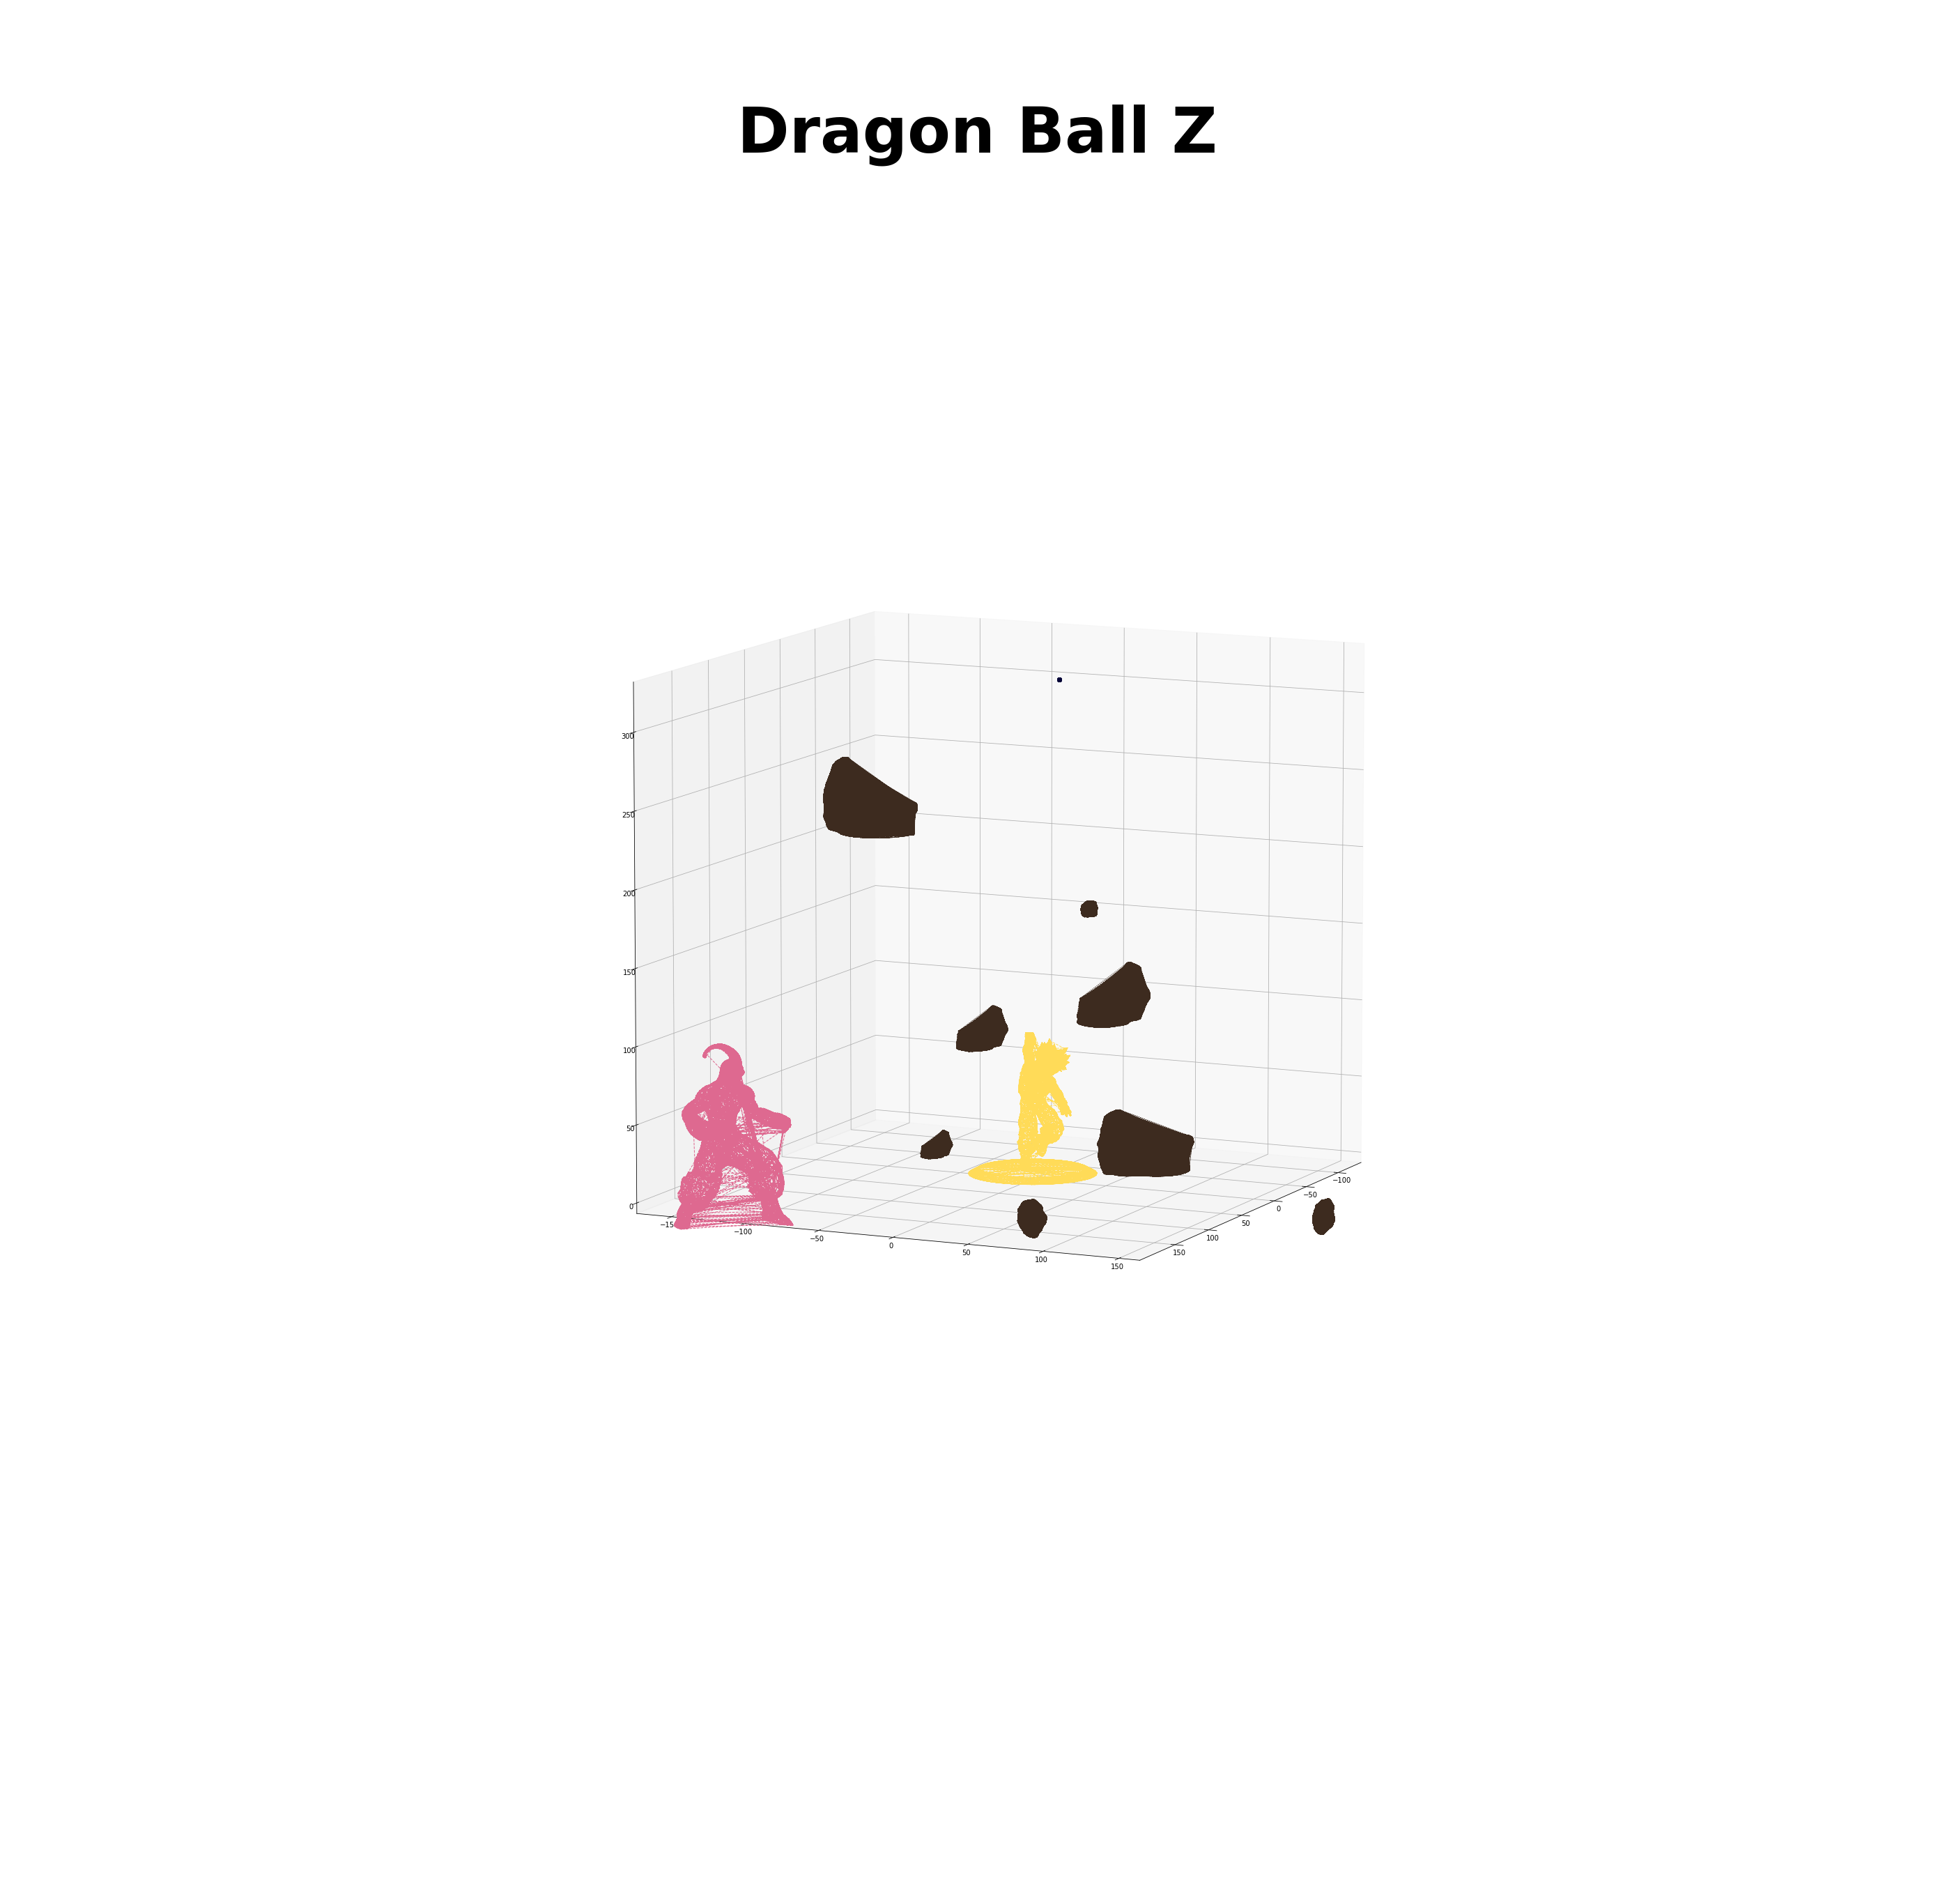

In [3]:
# LORENZO PEREIRA PICCOLI XAVIER
# SEGUNDO TRABALHO EXPRESSÃO GRÁFICA


# Includes
from stl import mesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, art3d  
from math import pi,cos,sin
from matplotlib import animation, rc
from IPython.display import HTML, Image # For GIF
import matplotlib
import matplotlib.animation as animation

 
 
###################################################
# Functions definitions
###################################################
 
# Complementary function to make the 3D axes aspect equal 
def set_axes_equal(ax):
    #Make axes of 3D plot have equal scale so that spheres appear as spheres,
    #cubes as cubes, etc..  This is one possible solution to Matplotlib's
    #ax.set_aspect('equal') and ax.axis('equal') not working for 3D.
 
    #Input
    #  ax: a matplotlib axis, e.g., as output from plt.gca().
    
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()
 
    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)
 
    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])
 
    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    print("x lim")
    print(x_middle)
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    print("y lim")
    print(y_middle)
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])
    print("z lim")
    print(z_middle)
    #resp
    '''
    x lim
    -130.18376541137695 194.18376541137695
    y lim
    -167.18376541137695 157.18376541137695
    z lim
    0.0 324.3675308227539
    '''
 
 
class Matrix:
    # Function for building the scale Matrix 
    def scale(k):
        M = (np.eye(4)) * k
        M[-1,:] = [0,0,0,1]
        return M

    # Function for building the translation Matrix 
    def translation(dist_x,dist_y,dist_z):
        last_column = np.array([[dist_x],[dist_y],[dist_z],[1]])
        M = np.eye(4)
        M[:,-1] = last_column.T
        return M
 
    # Function for building the Rotation Matrix around the axes
    def z_rotation(angle):
        M = np.array([[cos(angle),-sin(angle),0,0],[sin(angle),cos(angle),0,0],[0,0,1,0],[0,0,0,1]])
        return M
 
    def y_rotation(angle):
        M = np.array([[cos(angle),0,sin(angle),0],[0,1,0,0],[-sin(angle),0,cos(angle),0],[0,0,0,1]])
        return M
 
    def x_rotation(angle):
        M = np.array([[1,0,0,0],[0, cos(angle),-sin(angle),0],[0, sin(angle),cos(angle),0],[0,0,0,1]])
        return M

    def x_rotation_3(angle):
        M = np.array([[1,0,0],[0, cos(angle),-sin(angle)],[0, sin(angle),cos(angle)]])
        return M

    def y_rotation_3(angle):
        M = np.array([[cos(angle),0,sin(angle)],[0,1,0],[-sin(angle),0,cos(angle)]])
        return M

    def z_rotation_3(angle):
        M = np.array([[cos(angle),-sin(angle),0],[sin(angle),cos(angle),0],[0,0,1]])
        return M
 
def Rock_builder(scale, dist_x, dist_y, dist_z, angle, axis):
    print("Building -> rock")

    # Load the STL files and add the vectors to the plot
    your_mesh = mesh.Mesh.from_file('rock.stl')
    
    # Define scale matrix
    S = Matrix.scale(scale)
    # Get the x, y, z coordinates contained in the mesh structure that are the 
    # vertices of the triangular faces of the object
    
    x = your_mesh.x.flatten()
    y = your_mesh.y.flatten()
    z = your_mesh.z.flatten()
    
    # Create the 3D object from the x,y,z coordinates and add the additional array of ones to 
    # represent the object using homogeneous coordinates
    rock = np.array([x.T,y.T,z.T,np.ones(x.size)])

    # Extract vectors of mesh
    rock_vectors = your_mesh.vectors
    
    '''
    # Get the shape of the vectors mesh
    print("shape rock")
    print(Genki_rock_vectors.shape)
    #(7836, 3, 3)

    # Get the minimum point of the object STL, to do the transformations about this point
    print(your_mesh.min_)
    #[-38.64878 -27.        0.     ]
    '''

    # Translate the minimum poin for origin for apply the transformations of scale and rotation
    rock = np.dot(Matrix.translation(38,27,0), rock)
    if (axis==0):
        #your_mesh.rotate_using_matrix(Matrix.x_rotation_3(angle))
        rock = np.dot(Matrix.x_rotation(angle), rock)
    if (axis==1):
        #your_mesh.rotate_using_matrix(Matrix.y_rotation_3(angle))
        rock = np.dot(Matrix.y_rotation(angle), rock)
    if (axis==2):
        #your_mesh.rotate_using_matrix(Matrix.z_rotation_3(angle))
        rock = np.dot(Matrix.z_rotation(angle), rock)

    # Apply Scale
    rock = np.dot(S,rock)
    # Translate the minimum for the his local original
    rock = np.dot(Matrix.translation(-38,-27,0),rock)
    # Apply translation
    rock = np.dot(Matrix.translation(dist_x,dist_y,dist_z),rock)

    rock_cut = np.array([rock[0:3,:]])
    rock_vectors = np.transpose(rock_cut)
    # Reshape to initial condition of vectors mesh
    rock_vectors = np.reshape(rock_vectors, (44266, 3, 3), order='C')

    return (rock,rock_vectors)

def Genki_dama_builder(scale, dist_x, dist_y, dist_z, angle, axis):
    print("Building -> genki dama")

    # Load the STL files and add the vectors to the plot
    your_mesh = mesh.Mesh.from_file('Hex.stl')

    # Define scale matrix
    S = Matrix.scale(scale)

    # Get the x, y, z coordinates contained in the mesh structure that are the 
    # vertices of the triangular faces of the object
    
    x = your_mesh.x.flatten()
    y = your_mesh.y.flatten()
    z = your_mesh.z.flatten()
    
    # Create the 3D object from the x,y,z coordinates and add the additional array of ones to 
    # represent the object using homogeneous coordinates
    Genki_dama = np.array([x.T, y.T, z.T, np.ones(x.size)])
    
    # Extract vectors of mesh
    Genki_dama_vectors = your_mesh.vectors
    '''
    # Get the shape of the vectors mesh
    print("shape dama")
    print(Genki_dama_vectors.shape)
    #(7836, 3, 3)

    # Get the minimum point of the object STL, to do the transformations about this point
    print(your_mesh.min_)
    #min:[ -89.36753  -171.36752    -9.367531]
    '''

    # Translate the minimum poin for origin for apply the transformations of scale and rotation
    Genki_dama = np.dot(Matrix.translation(0,0,-99.36), Genki_dama)
    if (axis==0):
        #your_mesh.rotate_using_matrix(Matrix.x_rotation_3(angle))
        Genki_dama = np.dot(Matrix.x_rotation(angle), Genki_dama)
    if (axis==1):
        #your_mesh.rotate_using_matrix(Matrix.y_rotation_3(angle))
        Genki_dama = np.dot(Matrix.y_rotation(angle),Genki_dama)
    if (axis==2):
        #your_mesh.rotate_using_matrix(Matrix.z_rotation_3(angle))
        Genki_dama = np.dot(Matrix.z_rotation(angle),Genki_dama)

    # Apply Scale
    Genki_dama = np.dot(S, Genki_dama)
    # Translate the minimum for the his local original
    Genki_dama = np.dot(Matrix.translation(0,0,99.36), Genki_dama)
    # Apply translation
    Genki_dama = np.dot(Matrix.translation(dist_x,dist_y,dist_z), Genki_dama)
    

    Genki_dama_cut = np.array([Genki_dama[0:3,:]])
    Genki_dama_vectors = np.transpose(Genki_dama_cut)
    # Reshape to initial condition of vectors mesh
    Genki_dama_vectors = np.reshape(Genki_dama_vectors, (7836, 3, 3), order='C')

    '''
    # Get the minimum point of the object STL, to do the transformations about this point
    print("-min_dama:")
    print(your_mesh.min_)
    # Get the maximum point of the object STL, to do the transformations about this point
    print("-max_dama:")
    print(your_mesh.max_)
    # Get the radius with this 2 informations
    '''

    return (Genki_dama, Genki_dama_vectors)

def Goku_builder(scale, dist_x, dist_y, dist_z, angle, axis):
    print("Building -> goku")

    # Load the STL files and add the vectors to the plot
    your_mesh = mesh.Mesh.from_file('trunks.stl')
    
    # Define scale matrix
    S = Matrix.scale(scale)

    # Apply Matrix of transformation in mesh
    your_mesh.transform(Matrix.translation(dist_x,dist_y,dist_z))

    x = your_mesh.x.flatten()
    y = your_mesh.y.flatten()
    z = your_mesh.z.flatten()
    
    # Create the 3D object from the x,y,z coordinates and add the additional array of ones to 
    # represent the object using homogeneous coordinates
    goku = np.array([x.T, y.T, z.T, np.ones(x.size)])
    
    # Extract vectors of mesh
    goku_vectors = your_mesh.vectors
    '''
    # Get the shape of the vectors mesh
    print("shape goku")
    print(goku_vectors.shape)
    #(13027, 3, 3)

    # Get the minimum point of the object STL, to do the transformations about this point
    print("minimum goku")
    print(your_mesh.min_)
    #[ -40.03046   -36.173645   -2.9365067 ]

    # Get the maximum point of the object STL, to do the transformations about this point
    print("maximum goku")
    print(your_mesh.max_)
    #[40.03046  36.173645 91.38975 ]
    '''
    # Translate the minimum poin for origin for apply the transformations of scale and rotation
    # goku = np.dot(Matrix.translation(40, 36, 3), goku)

    if (axis==0):
        #your_mesh.rotate_using_matrix(Matrix.x_rotation_3(angle))
        goku = np.dot(Matrix.x_rotation(angle), goku)
    if (axis==1):
        #your_mesh.rotate_using_matrix(Matrix.y_rotation_3(angle))
        goku = np.dot(Matrix.y_rotation(angle), goku)
    if (axis==2):
        #your_mesh.rotate_using_matrix(Matrix.z_rotation_3(angle))
        goku = np.dot(Matrix.z_rotation(angle), goku)

    # Apply Scale
    goku = np.dot(S,goku)
    # Translate the minimum for the his local original
    #goku = np.dot(Matrix.translation(-40, -36, -3),goku)
    # Apply translation
    goku = np.dot(Matrix.translation(dist_x,dist_y,dist_z),goku)

    goku_cut = np.array([goku[0:3,:]])
    goku_vectors = np.transpose(goku_cut)
    # Reshape to initial condition of vectors mesh
    goku_vectors = np.reshape(goku_vectors,(13027, 3, 3), order='C')

    return (goku, goku_vectors)

def Majin_boo_builder(scale, dist_x, dist_y, dist_z, angle, axis):
    print("Building -> majin boo")

    # Load the STL files and add the vectors to the plot
    your_mesh = mesh.Mesh.from_file('Majin_Boo.stl')
    
    # Define scale matrix
    S = Matrix.scale(scale)

    # Get the x, y, z coordinates contained in the mesh structure that are the 
    # vertices of the triangular faces of the object
    
    x = your_mesh.x.flatten()
    y = your_mesh.y.flatten()
    z = your_mesh.z.flatten()
    
    # Create the 3D object from the x,y,z coordinates and add the additional array of ones to 
    # represent the object using homogeneous coordinates
    Majin_boo = np.array([x.T, y.T, z.T, np.ones(x.size)])

    # Extract vectors of mesh
    Majin_boo_vectors = your_mesh.vectors
    '''
    # Get the shape of the vectors mesh
    print("shape Majin_boo")
    print(Majin_boo_vectors.shape)
    #(19540, 3, 3)

    # Get the minimum point of the object STL, to do the transformations about this point
    print("minimum Majin_boo")
    print(your_mesh.min_)
    #[ 24.577446 147.21425    0.      ]
    '''
    # Translate the minimum poin for origin for apply the transformations of scale and rotation
    Majin_boo = np.dot(Matrix.translation(-24.6,-147.2,0),Majin_boo)

    if (axis==0):
        #your_mesh.rotate_using_matrix(Matrix.x_rotation_3(angle))
        Majin_boo = np.dot(Matrix.x_rotation(angle), Majin_boo)
    if (axis==1):
        #your_mesh.rotate_using_matrix(Matrix.y_rotation_3(angle))
        Majin_boo = np.dot(Matrix.y_rotation(angle), Majin_boo)
    if (axis==2):
        #your_mesh.rotate_using_matrix(Matrix.z_rotation_3(angle))
        Majin_boo = np.dot(Matrix.z_rotation(angle), Majin_boo)
    if (axis==3):
        #your_mesh.rotate_using_matrix(Matrix.z_rotation_3(angle))
        Majin_boo = np.dot(Matrix.z_rotation(angle), Majin_boo)
        Majin_boo = np.dot(Matrix.x_rotation(angle), Majin_boo)
        Majin_boo = np.dot(Matrix.y_rotation(angle), Majin_boo)

    # Apply Scale
    Majin_boo = np.dot(S, Majin_boo)
    # Translate the minimum for the his local original
    Majin_boo = np.dot(Matrix.translation(24.6,147.2,0), Majin_boo)
    # Apply translation
    Majin_boo = np.dot(Matrix.translation(dist_x,dist_y,dist_z), Majin_boo)

    Majin_boo_cut = np.array([Majin_boo[0:3,:]])
    Majin_boo_vectors = np.transpose(Majin_boo_cut)
    # Reshape to initial condition of vectors mesh
    Majin_boo_vectors = np.reshape(Majin_boo_vectors, (19540, 3, 3), order='C')

    return (Majin_boo, Majin_boo_vectors)

# initialization function: 
def init():


    # Set the coordinates of the initial objects
    stone1.set_data(rock[0,:], rock[1,:])
    stone1.set_3d_properties(rock[2,:])
    stone2.set_data(rock2[0,:], rock2[1,:])
    stone2.set_3d_properties(rock2[2,:])
    stone3.set_data(rock3[0,:], rock3[1,:])
    stone3.set_3d_properties(rock3[2,:])
    stone4.set_data(rock4[0,:], rock4[1,:])
    stone4.set_3d_properties(rock4[2,:])
    stone5.set_data(rock5[0,:], rock5[1,:])
    stone5.set_3d_properties(rock5[2,:])
    stone6.set_data(rock6[0,:], rock6[1,:])
    stone6.set_3d_properties(rock6[2,:])
    stone7.set_data(rock7[0,:], rock7[1,:])
    stone7.set_3d_properties(rock7[2,:])
    stone8.set_data(rock8[0,:], rock8[1,:])
    stone8.set_3d_properties(rock8[2,:])

    goku_sayajin.set_data( goku[0,:], goku[1,:])
    goku_sayajin.set_3d_properties( goku[2,:])

    majin.set_data(Majin_boo[0,:], Majin_boo[1,:])
    majin.set_3d_properties(Majin_boo[2,:])

    dama.set_data(Genki_dama[0,:], Genki_dama[1,:])
    dama.set_3d_properties(Genki_dama[2,:])

    # Return the initial objects
    return ( goku_sayajin ,dama, majin, stone1, stone2, stone3, stone4, stone5, stone6, stone7, stone8 )
    
# animation function. This is called sequentially
def animate(i):

    print("Frame",i)
    trava=0
    
    if( i <= 25 ):
      # Rotate in axis x
      rock = Rock_builder(0.5,-60,-60,60,i*(pi/12.5),0)
      rock2 = Rock_builder(0.7,10,60,100,i*(pi/12.5),0)
      rock3 = Rock_builder(0.3,150,10,30,i*(pi/12.5),0)
      rock4 = Rock_builder(0.2,250,170,210,90+i*(pi/12.5),0)
      # Rotate in axis y
      rock5 = Rock_builder(0.3,0,200,-10,96+i*(pi/12.5),1)
      rock6 = Rock_builder(0.4,-10,-10,-30,40+i*(pi/12.5),1)
      # Rotate in axis z
      rock7 = Rock_builder(0.8,50,100,0,210+i*(pi/12.5),2)
      rock8 = Rock_builder(0.9,0,-150,200,190+i*(pi/12.5),2)

      Majin_boo = Majin_boo_builder(2,200,-200,i*10,180,2)

      Genki_dama = Genki_dama_builder(0.04*i,40,36,225,i*(pi/12.5),2)

      goku = Goku_builder(1,0,0,0,90-i*(pi/12.5),2)

      trava=1

    if( i >= 26 and i <= 50):
      cena2 =  i - 25
      goku_sayajin.set(color='#ffd700')
      # Rotate in axis x
      rock = Rock_builder(0.5*(1/cena2),-60,-60,60,cena2*(pi/4),0)
      rock2 = Rock_builder(0.7*(1/cena2),10,60,100,cena2*(pi/4),0)
      rock3 = Rock_builder(0.3*(1/cena2),150,10,30,cena2*(pi/4),0)
      rock4 = Rock_builder(0.2*(1/cena2),250,170,210,90+cena2*(pi/4),0)
      # Rotate in axis y
      rock5 = Rock_builder(0.3*(1/cena2),0,200,-10,96+cena2*(pi/4),1)
      rock6 = Rock_builder(0.4*(1/cena2),-10,-10,-30,40+cena2*(pi/4),1)
      rock5 = Rock_builder(0.3*(1/cena2),0,200,-10,96+cena2*(pi/4),1)
      rock6 = Rock_builder(0.4*(1/cena2),-10,-10,-30,40+cena2*(pi/4),1)
      # Rotate in axis z
      rock7 = Rock_builder(0.8*(1/cena2),50,100,0,210+cena2*(pi/4),2)
      rock8 = Rock_builder(0.9*(1/cena2),0,-150,200,190+cena2*(pi/4),2)

      Majin_boo = Majin_boo_builder(2,200,-200,250-cena2*10,180+cena2*(pi/50),2)

      Genki_dama = Genki_dama_builder(1.1-0.04*cena2,40,36,225,cena2*(pi/8),2)

      goku = Goku_builder(1,0,0,0,-2*pi+90-cena2*(pi/12.5),2)

      trava=1

    if( trava==1 ):
      stone1.set_data(rock[0][0,:], rock[0][1,:])
      stone1.set_3d_properties(rock[0][2,:])
      stone2.set_data(rock2[0][0,:], rock2[0][1,:])
      stone2.set_3d_properties(rock2[0][2,:])
      stone3.set_data(rock3[0][0,:], rock3[0][1,:])
      stone3.set_3d_properties(rock3[0][2,:])
      stone4.set_data(rock4[0][0,:], rock4[0][1,:])
      stone4.set_3d_properties(rock4[0][2,:])
      stone5.set_data(rock5[0][0,:], rock5[0][1,:])
      stone5.set_3d_properties(rock5[0][2,:])
      stone6.set_data(rock6[0][0,:], rock6[0][1,:])
      stone6.set_3d_properties(rock6[0][2,:])
      stone7.set_data(rock7[0][0,:], rock7[0][1,:])
      stone7.set_3d_properties(rock7[0][2,:])
      stone8.set_data(rock8[0][0,:], rock8[0][1,:])
      stone8.set_3d_properties(rock8[0][2,:])

    if(i >= 51 and i <= 75):
      print("yeah 50")
      cena3 =  i - 50
      dama.set(color='#120a8f', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=12)
      goku_sayajin.set(color='#ffff00')

      # Rotate in axis x
      rock = Rock_builder(0.5*(1/cena3),-60,-60,60+cena3*10,cena3*(pi/4),0)
      rock2 = Rock_builder(0.7*(1/cena3),10,60,100+cena3*10,cena3*(pi/4),0)
      rock3 = Rock_builder(0.3*(1/cena3),150,10,30+cena3*10,cena3*(pi/4),0)
      rock4 = Rock_builder(0.2*(1/cena3),250,170+15*i,210+cena3*10,90+cena3*(pi/4),0)
      # Rotate in axis y
      rock5 = Rock_builder(0.3*(1/cena3),0,200,-10+cena3*10,96+cena3*(pi/4),1)
      rock6 = Rock_builder(0.4*(1/cena3),-10,-10,-30+cena3*10,40+cena3*(pi/4),1)
      # Rotate in axis z
      rock7 = Rock_builder(0.8*(1/cena3),50,100,0+i*10,210+i*(pi/4),2)
      rock8 = Rock_builder(0.9*(1/cena3),0,-150,200+i*10,190+i*(pi/4),2)

      stone1.set_3d_properties(rock[0][2,:])
      stone2.set_data(rock2[0][0,:], rock2[0][1,:])
      stone2.set_3d_properties(rock2[0][2,:])
      stone3.set_data(rock3[0][0,:], rock3[0][1,:])
      stone3.set_3d_properties(rock3[0][2,:])
      stone4.set_data(rock4[0][0,:], rock4[0][1,:])
      stone4.set_3d_properties(rock4[0][2,:])
      stone5.set_data(rock5[0][0,:], rock5[0][1,:])
      stone5.set_3d_properties(rock5[0][2,:])
      stone6.set_data(rock6[0][0,:], rock6[0][1,:])
      stone6.set_3d_properties(rock6[0][2,:])
      stone7.set_data(rock7[0][0,:], rock7[0][1,:])
      stone7.set_3d_properties(rock7[0][2,:])
      stone8.set_data(rock8[0][0,:], rock8[0][1,:])
      stone8.set_3d_properties(rock8[0][2,:])

      Majin_boo = Majin_boo_builder(2,200-cena3*5,-200-cena3*5,0,180+(pi/2)-cena3*(pi/50),2)
      
      Genki_dama = Genki_dama_builder(1.1 + 0.0375*cena3,40,36,225,cena3*(pi/8),2)

      goku = Goku_builder(1,0,0,0,90,2)
    
    
    if(i >= 76 and i<=100):
      print("yeah 75")
      cena4 = i - 75
      dama.set(color='#120a8f', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=12)

      goku_sayajin.set(color='#ffAf00')

      # Remove the stones
      stone1.set_data(0, 0)
      stone1.set_3d_properties(0)
      stone2.set_data(0, 0)
      stone2.set_3d_properties(0)
      stone3.set_data(0, 0)
      stone3.set_3d_properties(0)
      stone4.set_data(0, 0)
      stone4.set_3d_properties(0)
      stone5.set_data(0, 0)
      stone5.set_3d_properties(0)
      stone6.set_data(0, 0)
      stone6.set_3d_properties(0)
      stone7.set_data(0, 0)
      stone7.set_3d_properties(0)
      stone8.set_data(0, 0)
      stone8.set_3d_properties(0)

      Majin_boo = Majin_boo_builder(2,200,-200,90,180+cena4*(pi/12.5),3)
      
      Genki_dama = Genki_dama_builder(2,40-cena4*7,36-cena4*10,225-cena4*6,cena4*(pi/8),2)

      goku = Goku_builder(1,0,0,0,90,2)

    if(i>=101):
      print("yeah 75")
      cena5 = i - 100
      dama.set(color='#000fff', linestyle='dashed', marker='o', markerfacecolor='#000fff', markersize=12)

      goku_sayajin.set(color='#ffAf00')

      # Remove the stones
      stone1.set_data(0, 0)
      stone1.set_3d_properties(0)
      stone2.set_data(0, 0)
      stone2.set_3d_properties(0)
      stone3.set_data(0, 0)
      stone3.set_3d_properties(0)
      stone4.set_data(0, 0)
      stone4.set_3d_properties(0)
      stone5.set_data(0, 0)
      stone5.set_3d_properties(0)
      stone6.set_data(0, 0)
      stone6.set_3d_properties(0)
      stone7.set_data(0, 0)
      stone7.set_3d_properties(0)
      stone8.set_data(0, 0)
      stone8.set_3d_properties(0)

      Majin_boo = Majin_boo_builder(2,200,-200,90,180+2*pi-cena5*(pi/12.5),3)
      
      Genki_dama = Genki_dama_builder(2,-135-(cena5)*20,-214-(cena5+25)*20,75-(cena5+25)*20,cena5*(pi/8),2)

      goku = Goku_builder(1,0,0,0,90,2)


    majin.set_data(Majin_boo[0][0,:], Majin_boo[0][1,:])
    majin.set_3d_properties(Majin_boo[0][2,:])
    dama.set_data(Genki_dama[0][0,:], Genki_dama[0][1,:])
    dama.set_3d_properties(Genki_dama[0][2,:])
    goku_sayajin.set_data( goku[0][0,:], goku[0][1,:])
    goku_sayajin.set_3d_properties( goku[0][2,:])
    
    return ( goku_sayajin, dama, majin, stone1, stone2, stone3, stone4, stone5, stone6, stone7, stone8 )

# Save the animation as .gif
def save_animation_as_gif_image(write_animation, animation_name):
    """
    use animation.writers.list() to list writer current machine supported
    """
    print("Building the gif")
    write_animation.save(''.join((animation_name,'.gif')), writer=animation.PillowWriter(fps=40))
 
###################################################
# Building the objects of animation
###################################################

###########################################################
Aux = Majin_boo_builder(2,200,-200,0,180,2)
Majin_boo = Aux[0]
Majin_boo_vectors = Aux[1]
###########################################################
Aux = Goku_builder(1,0,0,0,90,2)
goku = Aux[0]
goku_vectors = Aux[1]
##########################################################
Aux = Rock_builder(0.5,-60,-60,60,0,-1)
rock = Aux[0]
rock_vectors = Aux[1]
##########################################################
Aux = Rock_builder(0.7,10,60,100,40,2)
rock2 = Aux[0]
rock2_vectors = Aux[1]
##########################################################
Aux = Rock_builder(0.3,150,10,30,50,1)
rock3 = Aux[0]
rock3_vectors = Aux[1]
##########################################################
Aux = Rock_builder(0.5,250,100,150,210,0)
rock4 = Aux[0]
rock4_vectors = Aux[1]
##########################################################
Aux = Rock_builder(0.3,0,200,-10,96,1)
rock5 = Aux[0]
rock5_vectors = Aux[1]
##########################################################
Aux = Rock_builder(0.45,150,200,120,190,1)
rock6 = Aux[0]
rock6_vectors = Aux[1]
##########################################################
Aux = Rock_builder(0.8,50,100,0,210,2)
rock7 = Aux[0]
rock7_vectors = Aux[1]
##########################################################
Aux = Rock_builder(0.9,0,-150,200,190,2)
rock8 = Aux[0]
rock8_vectors = Aux[1]
##########################################################
Aux = Genki_dama_builder(1,40,36,225,0,-1)
Genki_dama = Aux[0]
Genki_dama_vectors = Aux[1]
##########################################################
 

###################################################
# Plotting the 3D triangular faces of the object
###################################################
 
# Create a new plot
fig = plt.figure(2, figsize=[50,50])
axes1 = plt.axes(projection='3d')
'''
# Plot and render the faces of the object
#axes1.add_collection3d(art3d.Poly3DCollection(rock,closed=True,zsort='min',cmap="hot", alpha=0.9))
# Plot the contours of the faces of the object
axes1.add_collection3d(art3d.Line3DCollection(rock_vectors, colors='k', linewidths=0.2, linestyles='-'))
# Plot the vertices of the object
#axes1.plot(rock[0,:],rock[1,:],rock[2,:],'k.')
 
# Plot and render the faces of the object
#axes1.add_collection3d(art3d.Poly3DCollection(rock2,closed=True,zsort='min',cmap="hot", alpha=0.9))
# Plot the contours of the faces of the object
axes1.add_collection3d(art3d.Line3DCollection(rock2_vectors, colors='k', linewidths=0.2, linestyles='-'))
# Plot the vertices of the object
#axes1.plot(rock[0,:],rock[1,:],rock[2,:],'k.')
 
# Plot and render the faces of the object
#axes1.add_collection3d(art3d.Poly3DCollection(rock3,closed=True,zsort='min',cmap="hot", alpha=0.9))
# Plot the contours of the faces of the object
axes1.add_collection3d(art3d.Line3DCollection(rock3_vectors, colors='k', linewidths=0.2, linestyles='-'))
# Plot the vertices of the object
#axes1.plot(rock[0,:],rock[1,:],rock[2,:],'k.')

# Plot and render the faces of the object
#axes1.add_collection3d(art3d.Poly3DCollection(rock4,closed=True,zsort='min',cmap="hot", alpha=0.9))
# Plot the contours of the faces of the object
axes1.add_collection3d(art3d.Line3DCollection(rock4_vectors, colors='k', linewidths=0.2, linestyles='-'))
# Plot the vertices of the object
#axes1.plot(rock4[0,:],rock4[1,:],rock4[2,:],'k.')

# Plot and render the faces of the object
#axes1.add_collection3d(art3d.Poly3DCollection(rock5,closed=True,zsort='min',cmap="hot", alpha=0.9))
# Plot the contours of the faces of the object
axes1.add_collection3d(art3d.Line3DCollection(rock5_vectors, colors='k', linewidths=0.2, linestyles='-'))
# Plot the vertices of the object
#axes1.plot(rock5[0,:],rock5[1,:],rock5[2,:],'k.')

# Plot and render the faces of the object
#axes1.add_collection3d(art3d.Poly3DCollection(rock6,closed=True,zsort='min',cmap="hot", alpha=0.9))
# Plot the contours of the faces of the object
axes1.add_collection3d(art3d.Line3DCollection(rock6_vectors, colors='k', linewidths=0.2, linestyles='-'))
# Plot the vertices of the object
#axes1.plot(rock6[0,:],rock6[1,:],rock6[2,:],'k.')

# Plot and render the faces of the object
#axes1.add_collection3d(art3d.Poly3DCollection(rock5,closed=True,zsort='min',cmap="hot", alpha=0.9))
# Plot the contours of the faces of the object
axes1.add_collection3d(art3d.Line3DCollection(rock7_vectors, colors='k', linewidths=0.2, linestyles='-'))
# Plot the vertices of the object
#axes1.plot(rock5[0,:],rock5[1,:],rock5[2,:],'k.')

# Plot and render the faces of the object
#axes1.add_collection3d(art3d.Poly3DCollection(rock6,closed=True,zsort='min',cmap="hot", alpha=0.9))
# Plot the contours of the faces of the object
axes1.add_collection3d(art3d.Line3DCollection(rock8_vectors, colors='k', linewidths=0.2, linestyles='-'))
# Plot the vertices of the object
#axes1.plot(rock6[0,:],rock6[1,:],rock6[2,:],'k.')

# Plot and render the faces of the object
axes1.add_collection3d(art3d.Poly3DCollection(goku_vectors,closed=True,zsort='min',cmap="hot", alpha=0.9, color='#FFFFFF'))
# Plot the contours of the faces of the object
axes1.add_collection3d(art3d.Line3DCollection(goku_vectors, colors='k', linewidths=0.2, linestyles='-'))
# Plot the vertices of the object
#axes1.plot(goku[0,:],goku[1,:],goku[2,:],'k.')

# Plot and render the faces of the object
#axes1.add_collection3d(art3d.Poly3DCollection(Genki_dama_vectors,closed=True,zsort='min',edgecolor="r",facecolor = "r"))
# Plot the contours of the faces of the object
axes1.add_collection3d(art3d.Line3DCollection(Genki_dama_vectors, colors='k', linewidths=0.2, linestyles='-'))
# Plot the vertices of the object
axes1.plot(Genki_dama[0,:],Genki_dama[1,:],Genki_dama[2,:],'k')

# Plot and render the faces of the object
axes1.add_collection3d(art3d.Poly3DCollection(Majin_boo_vectors,closed=True,zsort='min',cmap="hot", alpha=0.9, color='#FFFFFF'))
# Plot the contours of the faces of the object
axes1.add_collection3d(art3d.Line3DCollection(Majin_boo_vectors, colors='k', linewidths=0.2, linestyles='-'))
# Plot the vertices of the object
#axes1.plot(Majin_boo[0,:],Majin_boo[1,:],Majin_boo[2,:],'k.')
'''
#set_axes_equal(axes1)

'''
  
    x lim
    -130.18376541137695 194.18376541137695
    y lim
    -167.18376541137695 157.18376541137695
    z lim
    0.0 324.3675308227539
  
'''
#set_axes_equal(axes1)
axes1.set_xlim3d([-130,195])
axes1.set_ylim3d([-167,157])
axes1.set_zlim3d([0,325])
axes1.view_init(elev=10, azim=25)
axes1.dist=20
axes1.set_title("Dragon Ball Z", fontsize=90, fontweight="bold")
# Show the plots 
#plt.show()

# Set axes and their aspect
 

#####################
# Do the animation
#####################
 
# Listing the objects that are going to be drawn
goku_sayajin, = axes1.plot3D([], [], [], '--', lw=1, color='#ffdb58')
dama, = axes1.plot3D([], [], [], lw=1, color='#000037', linestyle='dashed', marker='o', markerfacecolor='#000037', markersize=6)
majin, = axes1.plot3D([], [], [], '--', lw=1, color='#DE6990')
stone1, = axes1.plot3D([], [], [], '--', lw=0.5, color='#3d2b1f')
stone2, = axes1.plot3D([], [], [], '--', lw=0.5, color='#3d2b1f')
stone3, = axes1.plot3D([], [], [], '--', lw=0.5, color='#3d2b1f')
stone4, = axes1.plot3D([], [], [], '--', lw=0.5, color='#3d2b1f')
stone5, = axes1.plot3D([], [], [], '--', lw=0.5, color='#3d2b1f')
stone6, = axes1.plot3D([], [], [], '--', lw=0.5, color='#3d2b1f')
stone7, = axes1.plot3D([], [], [], '--', lw=0.5, color='#3d2b1f')
stone8, = axes1.plot3D([], [], [], '--', lw=0.5, color='#3d2b1f')

#matplotlib.rcParams['animation.embed_limit'] = 2**25
# Make the animation
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=100, blit=True, cache_frame_data=False)

#save_animation_as_gif_image(anim, 'Dragon_Ball_Z')

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')
anim

Building -> majin boo
Building -> goku
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> genki dama
Building the gif
Frame 0
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> majin boo
Building -> genki dama
Building -> goku
Frame 1
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> majin boo
Building -> genki dama
Building -> goku
Frame 2
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> majin boo
Building -> genki dama
Building -> goku
Frame 3
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> rock
Building -> majin boo
B

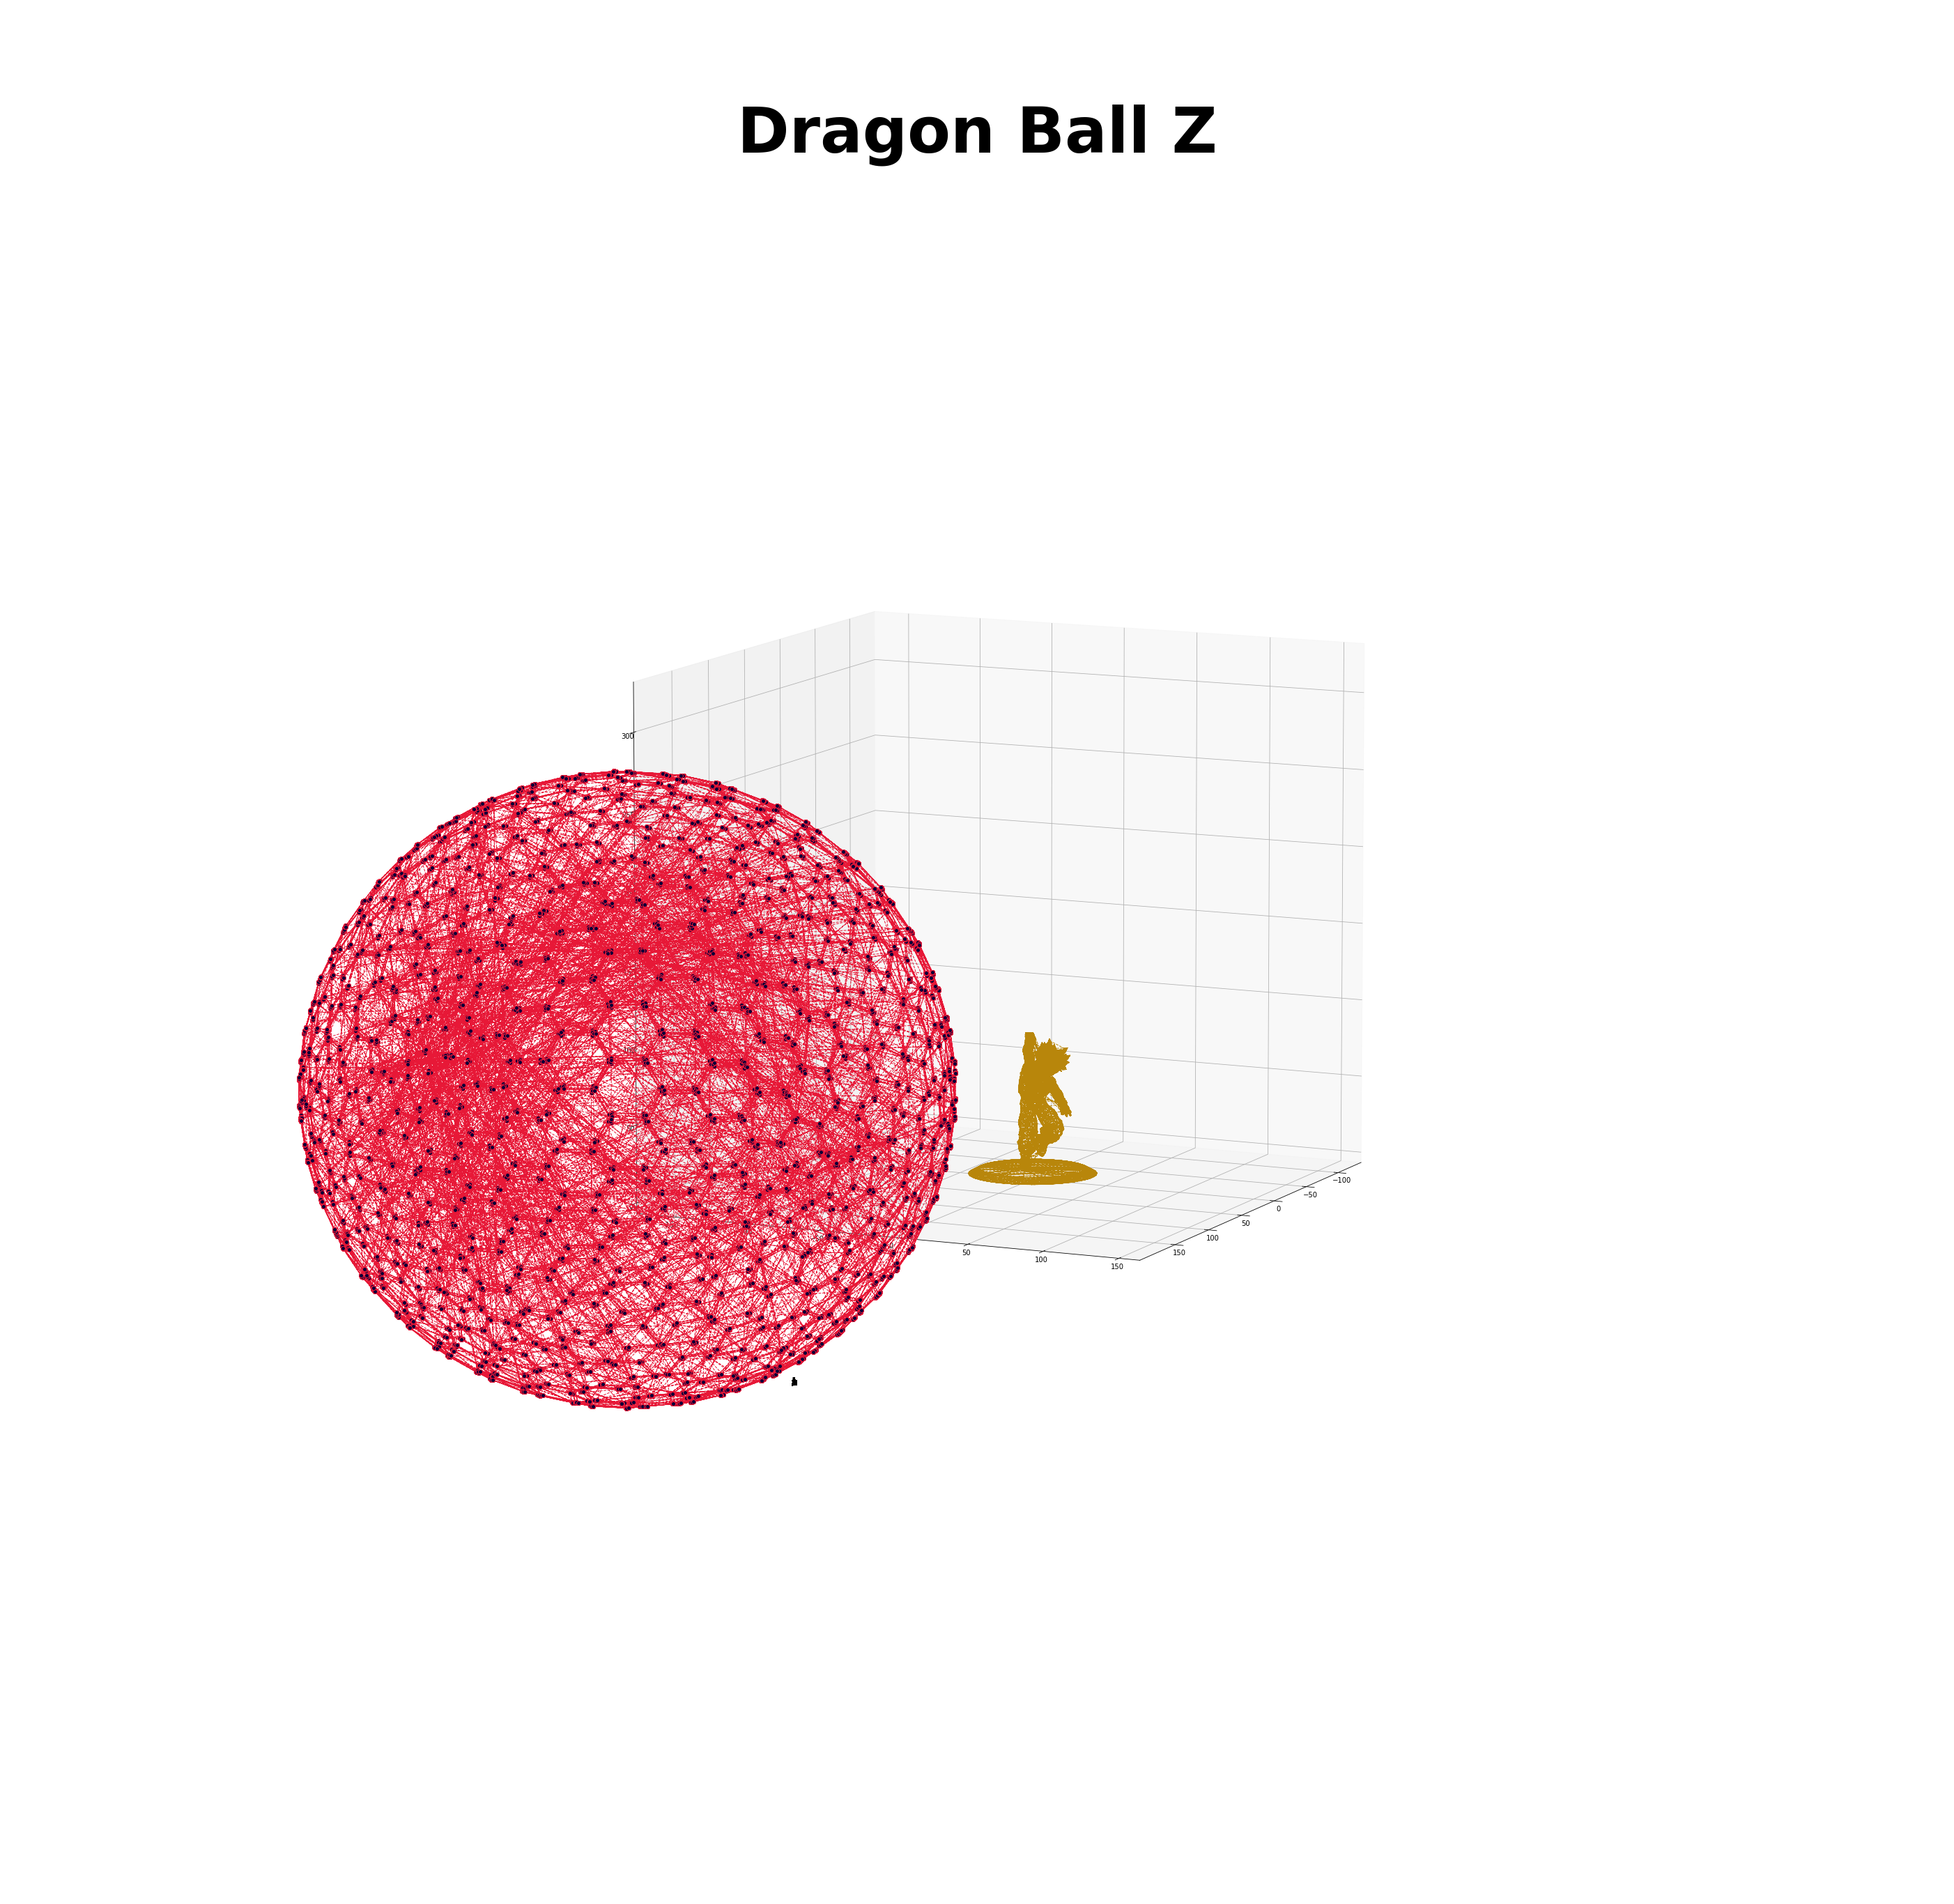

In [3]:
########################################
#  LORENZO PEREIRA PICCOLI XAVIER      #
#  MATRÍCULA: 2020101577               #
#  SEGUNDO TRABALHO EXPRESSÃO GRÁFICA  #
########################################

# O ARQUIVO A SER RODADO É O Dragon_Ball_Z.gif
# JA QUE A ANIMAÇÃO FICOU MUITO PESADA E ESTAVA DANDO ERRO AO CHAMAR O COMANDO "anim"


# Includes
from stl import mesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, art3d  
from math import pi,cos,sin
from matplotlib import animation, rc
from IPython.display import HTML, Image # For GIF
import matplotlib
import matplotlib.animation as animation
 
###################################################
# Functions definitions
###################################################
 
# Complementary function to make the 3D axes aspect equal 
def set_axes_equal(ax):
    #Make axes of 3D plot have equal scale so that spheres appear as spheres,
    #cubes as cubes, etc..  This is one possible solution to Matplotlib's
    #ax.set_aspect('equal') and ax.axis('equal') not working for 3D.
 
    # Input
    # ax: a matplotlib axis, e.g., as output from plt.gca().
    
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()
 
    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)
 
    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])
 
    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    print("x lim")
    print(x_middle)
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    print("y lim")
    print(y_middle)
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])
    print("z lim")
    print(z_middle)

    # Get the limits and then fixed it
    '''
    x lim
    -130.18376541137695 194.18376541137695
    y lim
    -167.18376541137695 157.18376541137695
    z lim
    0.0 324.3675308227539
    '''
 
 
class Matrix:
    # Function for building the scale Matrix 
    def scale(k):
        M = (np.eye(4)) * k
        M[-1,:] = [0,0,0,1]
        return M

    # Function for building the translation Matrix 
    def translation(dist_x,dist_y,dist_z):
        last_column = np.array([[dist_x],[dist_y],[dist_z],[1]])
        M = np.eye(4)
        M[:,-1] = last_column.T
        return M
 
    # Function for building the Rotation Matrix around the axes
    def z_rotation(angle):
        M = np.array([[cos(angle),-sin(angle),0,0],[sin(angle),cos(angle),0,0],[0,0,1,0],[0,0,0,1]])
        return M
 
    def y_rotation(angle):
        M = np.array([[cos(angle),0,sin(angle),0],[0,1,0,0],[-sin(angle),0,cos(angle),0],[0,0,0,1]])
        return M
 
    def x_rotation(angle):
        M = np.array([[1,0,0,0],[0, cos(angle),-sin(angle),0],[0, sin(angle),cos(angle),0],[0,0,0,1]])
        return M

 
def Rock_builder(scale, dist_x, dist_y, dist_z, angle, axis):
    print("Building -> rock")

    # Load the STL files and add the vectors to the plot
    your_mesh = mesh.Mesh.from_file('rock.stl')
    
    # Define scale matrix
    S = Matrix.scale(scale)

    # Get the x, y, z coordinates contained in the mesh structure that are the 
    # vertices of the triangular faces of the object
    x = your_mesh.x.flatten()
    y = your_mesh.y.flatten()
    z = your_mesh.z.flatten()
    
    # Create the 3D object from the x,y,z coordinates and add the additional array of ones to 
    # represent the object using homogeneous coordinates
    rock = np.array([x.T,y.T,z.T,np.ones(x.size)])

    # Extract vectors of mesh
    rock_vectors = your_mesh.vectors
    
    '''
    # Get the shape of the vectors mesh
    print("shape rock")
    print(Genki_rock_vectors.shape)
    #(7836, 3, 3)

    # Get the minimum point of the object STL, to do the transformations about this point
    print(your_mesh.min_)
    #[-38.64878 -27.        0.     ]
    '''

    # Translate the minimum poin for origin for apply the transformations of scale and rotation
    rock = np.dot(Matrix.translation(38,27,0), rock)

    if (axis==0):
        rock = np.dot(Matrix.x_rotation(angle), rock)

    if (axis==1):
        rock = np.dot(Matrix.y_rotation(angle), rock)

    if (axis==2):
        rock = np.dot(Matrix.z_rotation(angle), rock)

    # Apply Scale
    rock = np.dot(S,rock)

    # Translate the minimum for the his local original
    rock = np.dot(Matrix.translation(-38,-27,0),rock)

    # Apply translation
    rock = np.dot(Matrix.translation(dist_x,dist_y,dist_z),rock)

    rock_cut = np.array([rock[0:3,:]])

    rock_vectors = np.transpose(rock_cut)

    # Reshape to initial condition of vectors mesh
    rock_vectors = np.reshape(rock_vectors, (44266, 3, 3), order='C')

    return (rock,rock_vectors)

def Genki_dama_builder(scale, dist_x, dist_y, dist_z, angle, axis):
    print("Building -> genki dama")

    # Load the STL files and add the vectors to the plot
    your_mesh = mesh.Mesh.from_file('Hex.stl')

    # Define scale matrix
    S = Matrix.scale(scale)

    # Get the x, y, z coordinates contained in the mesh structure that are the 
    # vertices of the triangular faces of the object
    
    x = your_mesh.x.flatten()
    y = your_mesh.y.flatten()
    z = your_mesh.z.flatten()
    
    # Create the 3D object from the x,y,z coordinates and add the additional array of ones to 
    # represent the object using homogeneous coordinates
    Genki_dama = np.array([x.T, y.T, z.T, np.ones(x.size)])
    
    # Extract vectors of mesh
    Genki_dama_vectors = your_mesh.vectors

    '''
    # Get the shape of the vectors mesh
    print("shape dama")
    print(Genki_dama_vectors.shape)
    #(7836, 3, 3)

    # Get the minimum point of the object STL, to do the transformations about this point
    print(your_mesh.min_)
    #min:[ -89.36753  -171.36752    -9.367531]
    '''

    # Translate the middle point for origin for apply the transformations of scale and rotation
    Genki_dama = np.dot(Matrix.translation(0,0,-99.36), Genki_dama)

    if (axis==0):
        Genki_dama = np.dot(Matrix.x_rotation(angle), Genki_dama)

    if (axis==1):
        Genki_dama = np.dot(Matrix.y_rotation(angle),Genki_dama)

    if (axis==2):
        Genki_dama = np.dot(Matrix.z_rotation(angle),Genki_dama)

    # Apply Scale
    Genki_dama = np.dot(S, Genki_dama)
    # Translate the minimum for the his local original
    Genki_dama = np.dot(Matrix.translation(0,0,99.36), Genki_dama)
    # Apply translation
    Genki_dama = np.dot(Matrix.translation(dist_x,dist_y,dist_z), Genki_dama)
    
    Genki_dama_cut = np.array([Genki_dama[0:3,:]])

    Genki_dama_vectors = np.transpose(Genki_dama_cut)

    # Reshape to initial condition of vectors mesh
    Genki_dama_vectors = np.reshape(Genki_dama_vectors, (7836, 3, 3), order='C')

    '''
    # Get the minimum point of the object STL, to do the transformations about this point
    print("-min_dama:")
    print(your_mesh.min_)
    # Get the maximum point of the object STL, to do the transformations about this point
    print("-max_dama:")
    print(your_mesh.max_)
    # Get the radius with this 2 informations
    '''

    return (Genki_dama, Genki_dama_vectors)

def Goku_builder(scale, dist_x, dist_y, dist_z, angle, axis):
    print("Building -> goku")

    # Load the STL files and add the vectors to the plot
    your_mesh = mesh.Mesh.from_file('trunks.stl')
    
    # Define scale matrix
    S = Matrix.scale(scale)

    # Apply Matrix of transformation in mesh
    your_mesh.transform(Matrix.translation(dist_x,dist_y,dist_z))

    # Get the x, y, z coordinates contained in the mesh structure that are the 
    # vertices of the triangular faces of the object
    x = your_mesh.x.flatten()
    y = your_mesh.y.flatten()
    z = your_mesh.z.flatten()
    
    # Create the 3D object from the x,y,z coordinates and add the additional array of ones to 
    # represent the object using homogeneous coordinates
    goku = np.array([x.T, y.T, z.T, np.ones(x.size)])
    
    # Extract vectors of mesh
    goku_vectors = your_mesh.vectors

    '''
    # Get the shape of the vectors mesh
    print("shape goku")
    print(goku_vectors.shape)
    #(13027, 3, 3)

    # Get the minimum point of the object STL, to do the transformations about this point
    print("minimum goku")
    print(your_mesh.min_)
    #[ -40.03046   -36.173645   -2.9365067 ]

    # Get the maximum point of the object STL, to do the transformations about this point
    print("maximum goku")
    print(your_mesh.max_)
    #[40.03046  36.173645 91.38975 ]
    '''
    # Translate the minimum poin for origin for apply the transformations of scale and rotation
    # goku = np.dot(Matrix.translation(40, 36, 3), goku)

    if (axis==0):
        goku = np.dot(Matrix.x_rotation(angle), goku)

    if (axis==1):
        goku = np.dot(Matrix.y_rotation(angle), goku)

    if (axis==2):
        goku = np.dot(Matrix.z_rotation(angle), goku)

    # Apply Scale
    goku = np.dot(S,goku)

    # Translate the minimum for the his local original

    # Apply translation
    goku = np.dot(Matrix.translation(dist_x,dist_y,dist_z),goku)

    goku_cut = np.array([goku[0:3,:]])

    goku_vectors = np.transpose(goku_cut)

    # Reshape to initial condition of vectors mesh
    goku_vectors = np.reshape(goku_vectors,(13027, 3, 3), order='C')

    return (goku, goku_vectors)

def Majin_boo_builder(scale, dist_x, dist_y, dist_z, angle, axis):
    print("Building -> majin boo")

    # Load the STL files and add the vectors to the plot
    your_mesh = mesh.Mesh.from_file('Majin_Boo.stl')
    
    # Define scale matrix
    S = Matrix.scale(scale)

    # Get the x, y, z coordinates contained in the mesh structure that are the 
    # vertices of the triangular faces of the object
    x = your_mesh.x.flatten()
    y = your_mesh.y.flatten()
    z = your_mesh.z.flatten()
    
    # Create the 3D object from the x,y,z coordinates and add the additional array of ones to 
    # represent the object using homogeneous coordinates
    Majin_boo = np.array([x.T, y.T, z.T, np.ones(x.size)])

    # Extract vectors of mesh
    Majin_boo_vectors = your_mesh.vectors
    '''
    # Get the shape of the vectors mesh
    print("shape Majin_boo")
    print(Majin_boo_vectors.shape)
    #(19540, 3, 3)

    # Get the minimum point of the object STL, to do the transformations about this point
    print("minimum Majin_boo")
    print(your_mesh.min_)
    #[ 24.577446 147.21425    0.      ]
    '''
    # Translate the minimum poin for origin for apply the transformations of scale and rotation
    Majin_boo = np.dot(Matrix.translation(-24.6,-147.2,0),Majin_boo)

    if (axis==0):
        Majin_boo = np.dot(Matrix.x_rotation(angle), Majin_boo)

    if (axis==1):
        Majin_boo = np.dot(Matrix.y_rotation(angle), Majin_boo)

    if (axis==2):
        Majin_boo = np.dot(Matrix.z_rotation(angle), Majin_boo)

    if (axis==3):
        Majin_boo = np.dot(Matrix.z_rotation(angle), Majin_boo)
        Majin_boo = np.dot(Matrix.x_rotation(angle), Majin_boo)
        Majin_boo = np.dot(Matrix.y_rotation(angle), Majin_boo)

    # Apply Scale
    Majin_boo = np.dot(S, Majin_boo)
    # Translate the minimum for the his local original
    Majin_boo = np.dot(Matrix.translation(24.6,147.2,0), Majin_boo)
    # Apply translation
    Majin_boo = np.dot(Matrix.translation(dist_x,dist_y,dist_z), Majin_boo)

    Majin_boo_cut = np.array([Majin_boo[0:3,:]])

    Majin_boo_vectors = np.transpose(Majin_boo_cut)

    # Reshape to initial condition of vectors mesh
    Majin_boo_vectors = np.reshape(Majin_boo_vectors, (19540, 3, 3), order='C')

    return (Majin_boo, Majin_boo_vectors)

# initialization function: 
def init():


    # Set the coordinates of the initial objects
    stone1.set_data(rock[0,:], rock[1,:])
    stone1.set_3d_properties(rock[2,:])
    stone2.set_data(rock2[0,:], rock2[1,:])
    stone2.set_3d_properties(rock2[2,:])
    stone3.set_data(rock3[0,:], rock3[1,:])
    stone3.set_3d_properties(rock3[2,:])
    stone4.set_data(rock4[0,:], rock4[1,:])
    stone4.set_3d_properties(rock4[2,:])
    stone5.set_data(rock5[0,:], rock5[1,:])
    stone5.set_3d_properties(rock5[2,:])
    stone6.set_data(rock6[0,:], rock6[1,:])
    stone6.set_3d_properties(rock6[2,:])
    stone7.set_data(rock7[0,:], rock7[1,:])
    stone7.set_3d_properties(rock7[2,:])
    stone8.set_data(rock8[0,:], rock8[1,:])
    stone8.set_3d_properties(rock8[2,:])

    goku_sayajin.set_data( goku[0,:], goku[1,:])
    goku_sayajin.set_3d_properties( goku[2,:])

    majin.set_data(Majin_boo[0,:], Majin_boo[1,:])
    majin.set_3d_properties(Majin_boo[2,:])

    dama.set_data(Genki_dama[0,:], Genki_dama[1,:])
    dama.set_3d_properties(Genki_dama[2,:])

    # Return the initial objects
    return ( goku_sayajin ,dama, majin, stone1, stone2, stone3, stone4, stone5, stone6, stone7, stone8 )
    
# animation function. This is called sequentially
def animate(i):

    print("Frame",i)
    trava=0
    
    if ( i <= 25 ):
      # Rotate in axis x
      rock = Rock_builder(0.5,-60,-60,60,i*(pi/12.5),0)
      rock2 = Rock_builder(0.7,10,60,100,i*(pi/12.5),0)
      rock3 = Rock_builder(0.3,150,10,30,i*(pi/12.5),0)
      rock4 = Rock_builder(0.2,250,170,210,90+i*(pi/12.5),0)
      # Rotate in axis y
      rock5 = Rock_builder(0.3,0,200,-10,96+i*(pi/12.5),1)
      rock6 = Rock_builder(0.4,-10,-10,-30,40+i*(pi/12.5),1)
      # Rotate in axis z
      rock7 = Rock_builder(0.8,50,100,0,210+i*(pi/12.5),2)
      rock8 = Rock_builder(0.9,0,-150,200,190+i*(pi/12.5),2)

      Majin_boo = Majin_boo_builder(2,200,-200,i*10,180,2)

      Genki_dama = Genki_dama_builder(0.04*i,40,36,225,i*(pi/12.5),2)

      goku = Goku_builder(1,0,0,0,90-i*(pi/12.5),2)

      trava=1

    if ( i >= 26 and i <= 50):
      cena2 =  i - 25
      goku_sayajin.set(color='#ffd700')
      # Rotate in axis x
      rock = Rock_builder(0.5*(2/cena2),-60,-60,60,cena2*(pi/4),0)
      rock2 = Rock_builder(0.7*(2/cena2),10,60,100,cena2*(pi/4),0)
      rock3 = Rock_builder(0.3*(2/cena2),150,10,30,cena2*(pi/4),0)
      rock4 = Rock_builder(0.2*(2/cena2),250,170,210,90+cena2*(pi/4),0)
      # Rotate in axis y
      rock5 = Rock_builder(0.3*(2/cena2),0,200,-10,96+cena2*(pi/4),1)
      rock6 = Rock_builder(0.4*(2/cena2),-10,-10,-30,40+cena2*(pi/4),1)
      rock5 = Rock_builder(0.3*(2/cena2),0,200,-10,96+cena2*(pi/4),1)
      rock6 = Rock_builder(0.4*(2/cena2),-10,-10,-30,40+cena2*(pi/4),1)
      # Rotate in axis z
      rock7 = Rock_builder(0.8*(2/cena2),50,100,0,210+cena2*(pi/4),2)
      rock8 = Rock_builder(0.9*(2/cena2),0,-150,200,190+cena2*(pi/4),2)

      Majin_boo = Majin_boo_builder(2,200,-200+5*cena2,250-cena2*10,180+cena2*(pi/50),2)

      Genki_dama = Genki_dama_builder(1.1-0.04*cena2,40,36,225,cena2*(pi/8),2)

      goku = Goku_builder(1,0,0,0,-2*pi+90-cena2*(pi/12.5),2)

      trava=1

    if ( trava==1 ):
      stone1.set_data(rock[0][0,:], rock[0][1,:])
      stone1.set_3d_properties(rock[0][2,:])
      stone2.set_data(rock2[0][0,:], rock2[0][1,:])
      stone2.set_3d_properties(rock2[0][2,:])
      stone3.set_data(rock3[0][0,:], rock3[0][1,:])
      stone3.set_3d_properties(rock3[0][2,:])
      stone4.set_data(rock4[0][0,:], rock4[0][1,:])
      stone4.set_3d_properties(rock4[0][2,:])
      stone5.set_data(rock5[0][0,:], rock5[0][1,:])
      stone5.set_3d_properties(rock5[0][2,:])
      stone6.set_data(rock6[0][0,:], rock6[0][1,:])
      stone6.set_3d_properties(rock6[0][2,:])
      stone7.set_data(rock7[0][0,:], rock7[0][1,:])
      stone7.set_3d_properties(rock7[0][2,:])
      stone8.set_data(rock8[0][0,:], rock8[0][1,:])
      stone8.set_3d_properties(rock8[0][2,:])

    if (i >= 51 and i <= 75):
      print("yeah 50")
      cena3 =  i - 50
      goku_sayajin.set(color='#FDA50F')

      # Rotate in axis x
      rock = Rock_builder(0.5*(2/(25+cena3)),-60,-60,60+cena3*10,cena3*(pi/4),0)
      rock2 = Rock_builder(0.7*(2/(25+cena3)),10,60,100+cena3*10,cena3*(pi/4),0)
      rock3 = Rock_builder(0.3*(2/(25+cena3)),150,10,30+cena3*10,cena3*(pi/4),0)
      rock4 = Rock_builder(0.2*(2/(25+cena3)),250,170+15*cena3,210+cena3*10,90+cena3*(pi/4),0)
      # Rotate in axis y
      rock5 = Rock_builder(0.3*(2/(25+cena3)),0,200,-10+cena3*10,96+cena3*(pi/4),1)
      rock6 = Rock_builder(0.4*(2/(25+cena3)),-10,-10,-30+cena3*10,40+cena3*(pi/4),1)
      # Rotate in axis z
      rock7 = Rock_builder(0.8*(2/(25+cena3)),50,100,0+cena3*10,210+cena3*(pi/4),2)
      rock8 = Rock_builder(0.9*(2/(25+cena3)),0,-150,200+cena3*10,190+cena3*(pi/4),2)

      stone1.set_3d_properties(rock[0][2,:])
      stone2.set_data(rock2[0][0,:], rock2[0][1,:])
      stone2.set_3d_properties(rock2[0][2,:])
      stone3.set_data(rock3[0][0,:], rock3[0][1,:])
      stone3.set_3d_properties(rock3[0][2,:])
      stone4.set_data(rock4[0][0,:], rock4[0][1,:])
      stone4.set_3d_properties(rock4[0][2,:])
      stone5.set_data(rock5[0][0,:], rock5[0][1,:])
      stone5.set_3d_properties(rock5[0][2,:])
      stone6.set_data(rock6[0][0,:], rock6[0][1,:])
      stone6.set_3d_properties(rock6[0][2,:])
      stone7.set_data(rock7[0][0,:], rock7[0][1,:])
      stone7.set_3d_properties(rock7[0][2,:])
      stone8.set_data(rock8[0][0,:], rock8[0][1,:])
      stone8.set_3d_properties(rock8[0][2,:])

      Majin_boo = Majin_boo_builder(2,200,-75-5*cena3,3.6*cena3,180+(pi/2)-cena3*(pi/50),2)
      
      Genki_dama = Genki_dama_builder(0.1 + 0.036*cena3,40,36,225,cena3*(pi/8),2)

      goku = Goku_builder(1,0,0,0,90,2)
    
    
    if (i >= 76 and i<=100):
      print("yeah 75")
      cena4 = i - 75

      goku_sayajin.set(color='#b8860b')

      # Remove the stones
      stone1.set_data(0, 0)
      stone1.set_3d_properties(0)
      stone2.set_data(0, 0)
      stone2.set_3d_properties(0)
      stone3.set_data(0, 0)
      stone3.set_3d_properties(0)
      stone4.set_data(0, 0)
      stone4.set_3d_properties(0)
      stone5.set_data(0, 0)
      stone5.set_3d_properties(0)
      stone6.set_data(0, 0)
      stone6.set_3d_properties(0)
      stone7.set_data(0, 0)
      stone7.set_3d_properties(0)
      stone8.set_data(0, 0)
      stone8.set_3d_properties(0)

      Majin_boo = Majin_boo_builder(2,200-cena4*2,-200-cena4*2,90,180+cena4*(pi/25),2)
      
      Genki_dama = Genki_dama_builder(1,40+(cena4)*8,36-(cena4)*7.84,225-(cena4)*1.8,cena4*(pi/8),2)

      goku = Goku_builder(1,0,0,0,90,2)

    if (i >= 101 ):
      print("yeah 75")
      cena5 = i - 100

      goku_sayajin.set(color='#b8860b')
      if (cena5>=1 and cena5<=5):
            dama.set(color='#e71837') 

      if (cena5>=6 and cena5<=10):
            dama.set(color='#111111')

      if (cena5>=11 and cena5<=15):
            dama.set(color='#e71837') 

      if (cena5>=16 and cena5<=20):
            dama.set(color='#111111')

      if (cena5>=21 and cena5<=25):
            dama.set(color='#e71837')
            majin.set(color='#000000')

      # Remove the stones
      stone1.set_data(0, 0)
      stone1.set_3d_properties(0)
      stone2.set_data(0, 0)
      stone2.set_3d_properties(0)
      stone3.set_data(0, 0)
      stone3.set_3d_properties(0)
      stone4.set_data(0, 0)
      stone4.set_3d_properties(0)
      stone5.set_data(0, 0)
      stone5.set_3d_properties(0)
      stone6.set_data(0, 0)
      stone6.set_3d_properties(0)
      stone7.set_data(0, 0)
      stone7.set_3d_properties(0)
      stone8.set_data(0, 0)
      stone8.set_3d_properties(0)

      Majin_boo = Majin_boo_builder(2*(1/(cena5)),150+cena5*2,-250+cena5*2,90-cena5*8,pi+180-(cena5)*(pi/8),2)

      Genki_dama = Genki_dama_builder(2,240,-160,180,cena5*(pi/8),2)

      goku = Goku_builder(1,0,0,0,90,2)


    majin.set_data(Majin_boo[0][0,:], Majin_boo[0][1,:])
    majin.set_3d_properties(Majin_boo[0][2,:])
    dama.set_data(Genki_dama[0][0,:], Genki_dama[0][1,:])
    dama.set_3d_properties(Genki_dama[0][2,:])
    goku_sayajin.set_data( goku[0][0,:], goku[0][1,:])
    goku_sayajin.set_3d_properties( goku[0][2,:])
    
    return ( goku_sayajin, dama, majin, stone1, stone2, stone3, stone4, stone5, stone6, stone7, stone8 )

# Save the animation as .gif
def save_animation_as_gif_image(write_animation, animation_name):
    """
    use animation.writers.list() to list writer current machine supported
    """
    print("Building the gif")
    write_animation.save(''.join((animation_name,'.gif')), writer=animation.PillowWriter(fps=10))
 
###################################################
# Building the objects of animation
###################################################

###########################################################
Aux = Majin_boo_builder(2,200,-200,0,180,2)
Majin_boo = Aux[0]
Majin_boo_vectors = Aux[1]
###########################################################
Aux = Goku_builder(1,0,0,0,90,2)
goku = Aux[0]
goku_vectors = Aux[1]
##########################################################
Aux = Rock_builder(0.5,-60,-60,60,0,-1)
rock = Aux[0]
rock_vectors = Aux[1]
##########################################################
Aux = Rock_builder(0.7,10,60,100,40,2)
rock2 = Aux[0]
rock2_vectors = Aux[1]
##########################################################
Aux = Rock_builder(0.3,150,10,30,50,1)
rock3 = Aux[0]
rock3_vectors = Aux[1]
##########################################################
Aux = Rock_builder(0.5,250,100,150,210,0)
rock4 = Aux[0]
rock4_vectors = Aux[1]
##########################################################
Aux = Rock_builder(0.3,0,200,-10,96,1)
rock5 = Aux[0]
rock5_vectors = Aux[1]
##########################################################
Aux = Rock_builder(0.45,150,200,120,190,1)
rock6 = Aux[0]
rock6_vectors = Aux[1]
##########################################################
Aux = Rock_builder(0.8,50,100,0,210,2)
rock7 = Aux[0]
rock7_vectors = Aux[1]
##########################################################
Aux = Rock_builder(0.9,0,-150,200,190,2)
rock8 = Aux[0]
rock8_vectors = Aux[1]
##########################################################
Aux = Genki_dama_builder(1,40,36,225,0,-1)
Genki_dama = Aux[0]
Genki_dama_vectors = Aux[1]
##########################################################
 

###################################################
# Plotting the 3D triangular faces of the object
###################################################
 
# Create a new plot
fig = plt.figure(2, figsize=[50,50])
axes1 = plt.axes(projection='3d')

# Set axes and their aspect
axes1.set_xlim3d([-130,195])
axes1.set_ylim3d([-167,157])
axes1.set_zlim3d([0,325])
axes1.view_init(elev=10, azim=25)
axes1.dist=20
axes1.set_title("Dragon Ball Z", fontsize=90, fontweight="bold")


#####################
# Do the animation
#####################
 
# Listing the objects that are going to be drawn
goku_sayajin, = axes1.plot3D([], [], [], '--', lw=1, color='#ffdb58')
dama, = axes1.plot3D([], [], [], lw=1, color='#000037', linestyle='dashed', marker='o', markerfacecolor='#000037', markersize=6)
majin, = axes1.plot3D([], [], [], '--', lw=1, color='#DE6990')
stone1, = axes1.plot3D([], [], [], '--', lw=0.5, color='#3d2b1f')
stone2, = axes1.plot3D([], [], [], '--', lw=0.5, color='#3d2b1f')
stone3, = axes1.plot3D([], [], [], '--', lw=0.5, color='#3d2b1f')
stone4, = axes1.plot3D([], [], [], '--', lw=0.5, color='#3d2b1f')
stone5, = axes1.plot3D([], [], [], '--', lw=0.5, color='#3d2b1f')
stone6, = axes1.plot3D([], [], [], '--', lw=0.5, color='#3d2b1f')
stone7, = axes1.plot3D([], [], [], '--', lw=0.5, color='#3d2b1f')
stone8, = axes1.plot3D([], [], [], '--', lw=0.5, color='#3d2b1f')

# Set new maximum of size in MB
matplotlib.rcParams['animation.embed_limit'] = 110

# Make the animation
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=125, interval=100, blit=True)

# I'm saving as gif because the anim command return error of big size of the file 
save_animation_as_gif_image(anim, 'Dragon_Ball_Z')

# Note: below is the part which makes it work on Colab
# rc('animation', html='jshtml')
# anim